# Terphenyl Heteropolymer Analysis Notebook

In this notebook I will perform several data analysis on the RHH terphenyl octamer. This molecule has 3 aromatic moieties connected with peptide-linkers. Collaborators in the Gellman group, at U Wisc-Ma., have been trying to synthesize and characterize this molecule. This would represent a novel type of foldamer molecule.

## Replica Exchange Energy Distributions

For replica exchange data, it is imporant to see the overlap of energy states from each replica. For this reason we will look at the histogram of energies from each simulation and confirm that energies each replica is behaving as expected.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import panedr
import matplotlib.pyplot as plt
import numpy as np
import os
import pymbar
import mdtraj
import analysis_library
import itertools
from scipy.constants import physical_constants, find
import tqdm

plt.style.use('ggplot')

In [3]:
energy_df = panedr.edr_to_df("/mnt/summit/simulations/octamer_Rchiral/RHH/remd_sim/225K_to_325K/sim0/npt.edr")
energy_df.head()

,Time,Bond,Angle,Proper Dih.,LJ-14,Coulomb-14,LJ (SR),Disper. corr.,Coulomb (SR),Coul. recip.,...,Pres-YZ,Pres-ZX,Pres-ZY,Pres-ZZ,#Surf*SurfTen,Box-Vel-XX,Box-Vel-YY,Box-Vel-ZZ,T-System,Lamb-System
0.0,0.0,3821.400879,15195.199219,515.260437,591.994446,-1047.726929,1063.418091,-28.662003,-5275.471191,1292.465820,...,115.141861,347.244385,115.143845,176.696198,615.206055,0.000000,0.000000,0.000000,226.623932,1.0
100.0,100.0,3951.689697,14925.915039,493.858887,582.200317,-1057.283936,-24041.978516,-10.134899,-4304.611328,302.315979,...,167.786377,105.012726,167.786377,368.049103,-1063.313721,0.000116,0.000116,0.000116,226.282211,1.0
200.0,200.0,3756.028809,15100.609375,495.191223,623.182983,-1056.179810,-23884.673828,-10.070463,-4301.423340,353.991455,...,48.791668,-49.580032,48.792316,348.390808,2802.044678,-0.002121,-0.002121,-0.002121,226.030457,1.0
300.0,300.0,3997.822266,15091.799805,504.088470,599.458862,-1050.571289,-24100.880859,-10.120700,-4341.618652,328.393677,...,-19.702532,373.134125,-19.701366,31.240614,726.304626,0.001995,0.001995,0.001995,223.546173,1.0
400.0,400.0,3760.550781,15026.639648,522.764282,570.192627,-1057.086914,-23996.125000,-10.100462,-4421.774414,332.130920,...,-4.289162,78.835785,-4.288706,482.891907,2405.204102,0.002528,0.002528,0.002528,225.371780,1.0


In [4]:
energy_df.keys()

Index(['Time', 'Bond', 'Angle', 'Proper Dih.', 'LJ-14', 'Coulomb-14',
       'LJ (SR)', 'Disper. corr.', 'Coulomb (SR)', 'Coul. recip.', 'LJ recip.',
       'Potential', 'Kinetic En.', 'Total Energy', 'Conserved En.',
       'Temperature', 'Pres. DC', 'Pressure', 'Constr. rmsd', 'Box-X', 'Box-Y',
       'Box-Z', 'Volume', 'Density', 'pV', 'Enthalpy', 'Vir-XX', 'Vir-XY',
       'Vir-XZ', 'Vir-YX', 'Vir-YY', 'Vir-YZ', 'Vir-ZX', 'Vir-ZY', 'Vir-ZZ',
       'Pres-XX', 'Pres-XY', 'Pres-XZ', 'Pres-YX', 'Pres-YY', 'Pres-YZ',
       'Pres-ZX', 'Pres-ZY', 'Pres-ZZ', '#Surf*SurfTen', 'Box-Vel-XX',
       'Box-Vel-YY', 'Box-Vel-ZZ', 'T-System', 'Lamb-System'],
      dtype='object')

In [5]:
# Extract Potential Energies from each simulation
sim_dir_name = "sim"
path = "/mnt/summit/simulations/octamer_Rchiral/RHH/remd_sim/225K_to_325K/"
n_replicas = 20

energies, temps = analysis_library.get_energies(sim_dir_name, path, n_replicas)

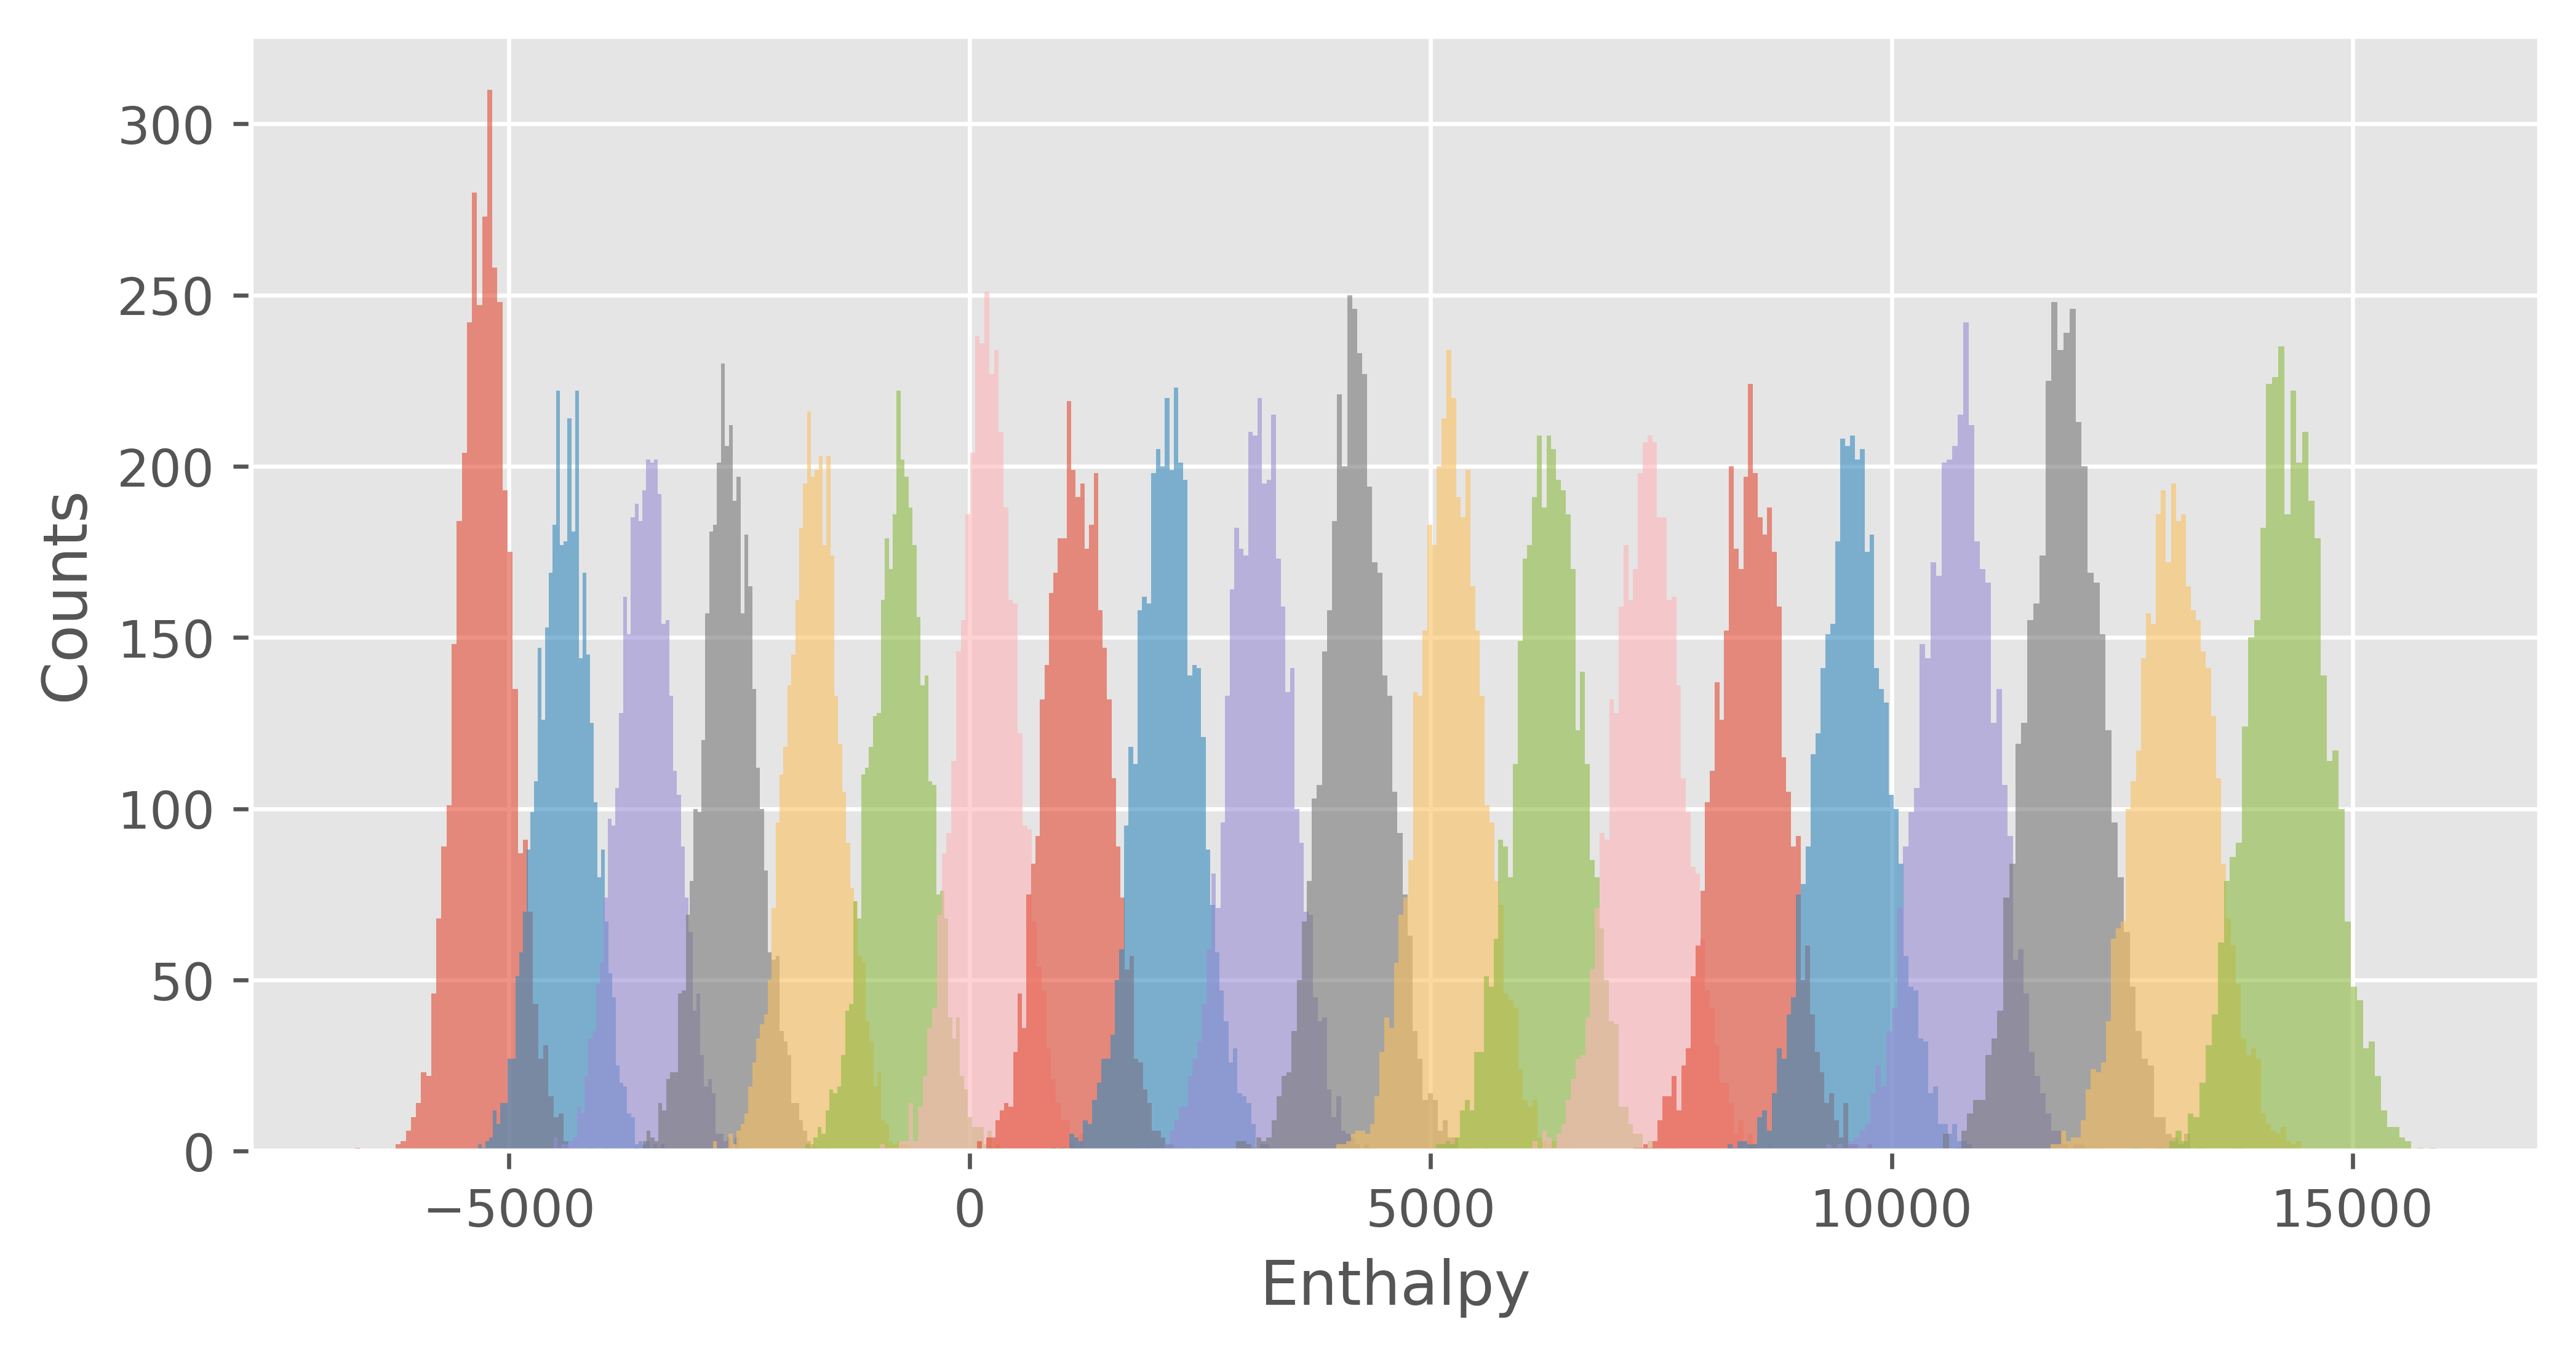

In [6]:
plt.figure(figsize=[8,4], dpi=600)
for i in range(len(temps)):
    # requires cutting off outlier (likely initial frame)
    plt.hist(energies[i][energies[i] > np.min(energies[i])], bins = 50, alpha = 0.6)
    plt.xlabel("Enthalpy")
    plt.ylabel("Counts")
# plt.legend([str(np.round(t, 1)) for t in temps])

In [7]:
for i in range(len(temps) - 1):
    print("Temperature:", temps[i])
    print("Delta beta:", 1/np.array(temps[i]) - 1/np.array(temps[i + 1]))

Temperature: 225.0
Delta beta: 8.51904480296357e-05
Temperature: 229.39704839920597
Delta beta: 8.355753023164998e-05
Temperature: 233.88002584118956
Delta beta: 8.19559119583967e-05
Temperature: 238.45061158888402
Delta beta: 8.038499326525235e-05
Temperature: 243.11051772211326
Delta beta: 7.884418570724971e-05
Temperature: 247.86148977891395
Delta beta: 7.73329121186413e-05
Temperature: 252.70530740939034
Delta beta: 7.585060639670382e-05
Temperature: 257.64378504234725
Delta beta: 7.439671328969815e-05
Temperature: 262.6787725649509
Delta beta: 7.297068818885345e-05
Temperature: 267.81215601567135
Delta beta: 7.157199692439057e-05
Temperature: 273.0458582907674
Delta beta: 7.020011556540867e-05
Temperature: 278.3818398645774
Delta beta: 6.885453022363944e-05
Temperature: 283.8220995238865
Delta beta: 6.753473686095003e-05
Temperature: 289.36867511664553
Delta beta: 6.624024110053186e-05
Temperature: 295.0236443153211
Delta beta: 6.4970558041718e-05
Temperature: 300.7891253951637
De

## Heat Capacity Curve

The nice thing about replica exchange simulations is we can compute the change of a systems heat capacity with temperature.This is especially useful for systems that experience large surface area changes during phase transistions, such as protein folding or melting transitions.

We'll be implementing heat capacity equation, using enthalpy:

$$C_p = \frac{d<H>}{dT}$$

We'll be calculating expectation heat capacities using the following formulas:



In [8]:
u_kln, n_samples, t_list, betas = analysis_library.construct_u_kln_matrix(temps, energies, add_temps = np.linspace(225, 325, 200))

In [9]:
# MBAR
mbar = pymbar.MBAR(u_kln, n_samples, verbose = True, relative_tolerance = 1e-10, initial_f_k= None, maximum_iterations=1000)

K (total states) = 220, total samples = 73500

They are therefore likely to to be the same thermodynamic state.  This can occasionally cause
numerical problems with computing the covariance of their energy difference, which must be
identically zero in any case. Consider combining them into a single state.


They are therefore likely to to be the same thermodynamic state.  This can occasionally cause
numerical problems with computing the covariance of their energy difference, which must be
identically zero in any case. Consider combining them into a single state.

N_k = 
[3675 3675 3675 3675 3675 3675 3675 3675 3675 3675 3675 3675 3675 3675
 3675 3675 3675 3675 3675 3675    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0   

In [10]:
# Building potential energy kln matrix
E_kln = u_kln
for k in range(u_kln.shape[1]):
    E_kln[:,k,:] *= betas[k]**(-1)

# mean and variance of energy
results = mbar.computeExpectations(E_kln, state_dependent=True, return_dict=True)
E_expected = results['mu']
dE_exoected = results['sigma']

In [11]:
# mean and variance of difference of energies
results = mbar.computeExpectations(E_kln, output='differences', state_dependent=True, return_dict=True)
DeltaE_expected = results['mu']
dDeltaE_expected = results['sigma']

In [12]:
# mean and variance of energies squared
results = mbar.computeExpectations(E_kln**2, state_dependent=True, return_dict=True)
E2_expected = results['mu']
dE2_expected = results['sigma']

In [13]:
kb = physical_constants["Boltzmann constant"][0] *  physical_constants["Avogadro constant"][0] / 1000 # J (molK)^-1

Cp_expect = (E2_expected - (E_expected*E_expected)) / (kb * t_list**2)

Text(0.5, 0, 'Temperature (K)')

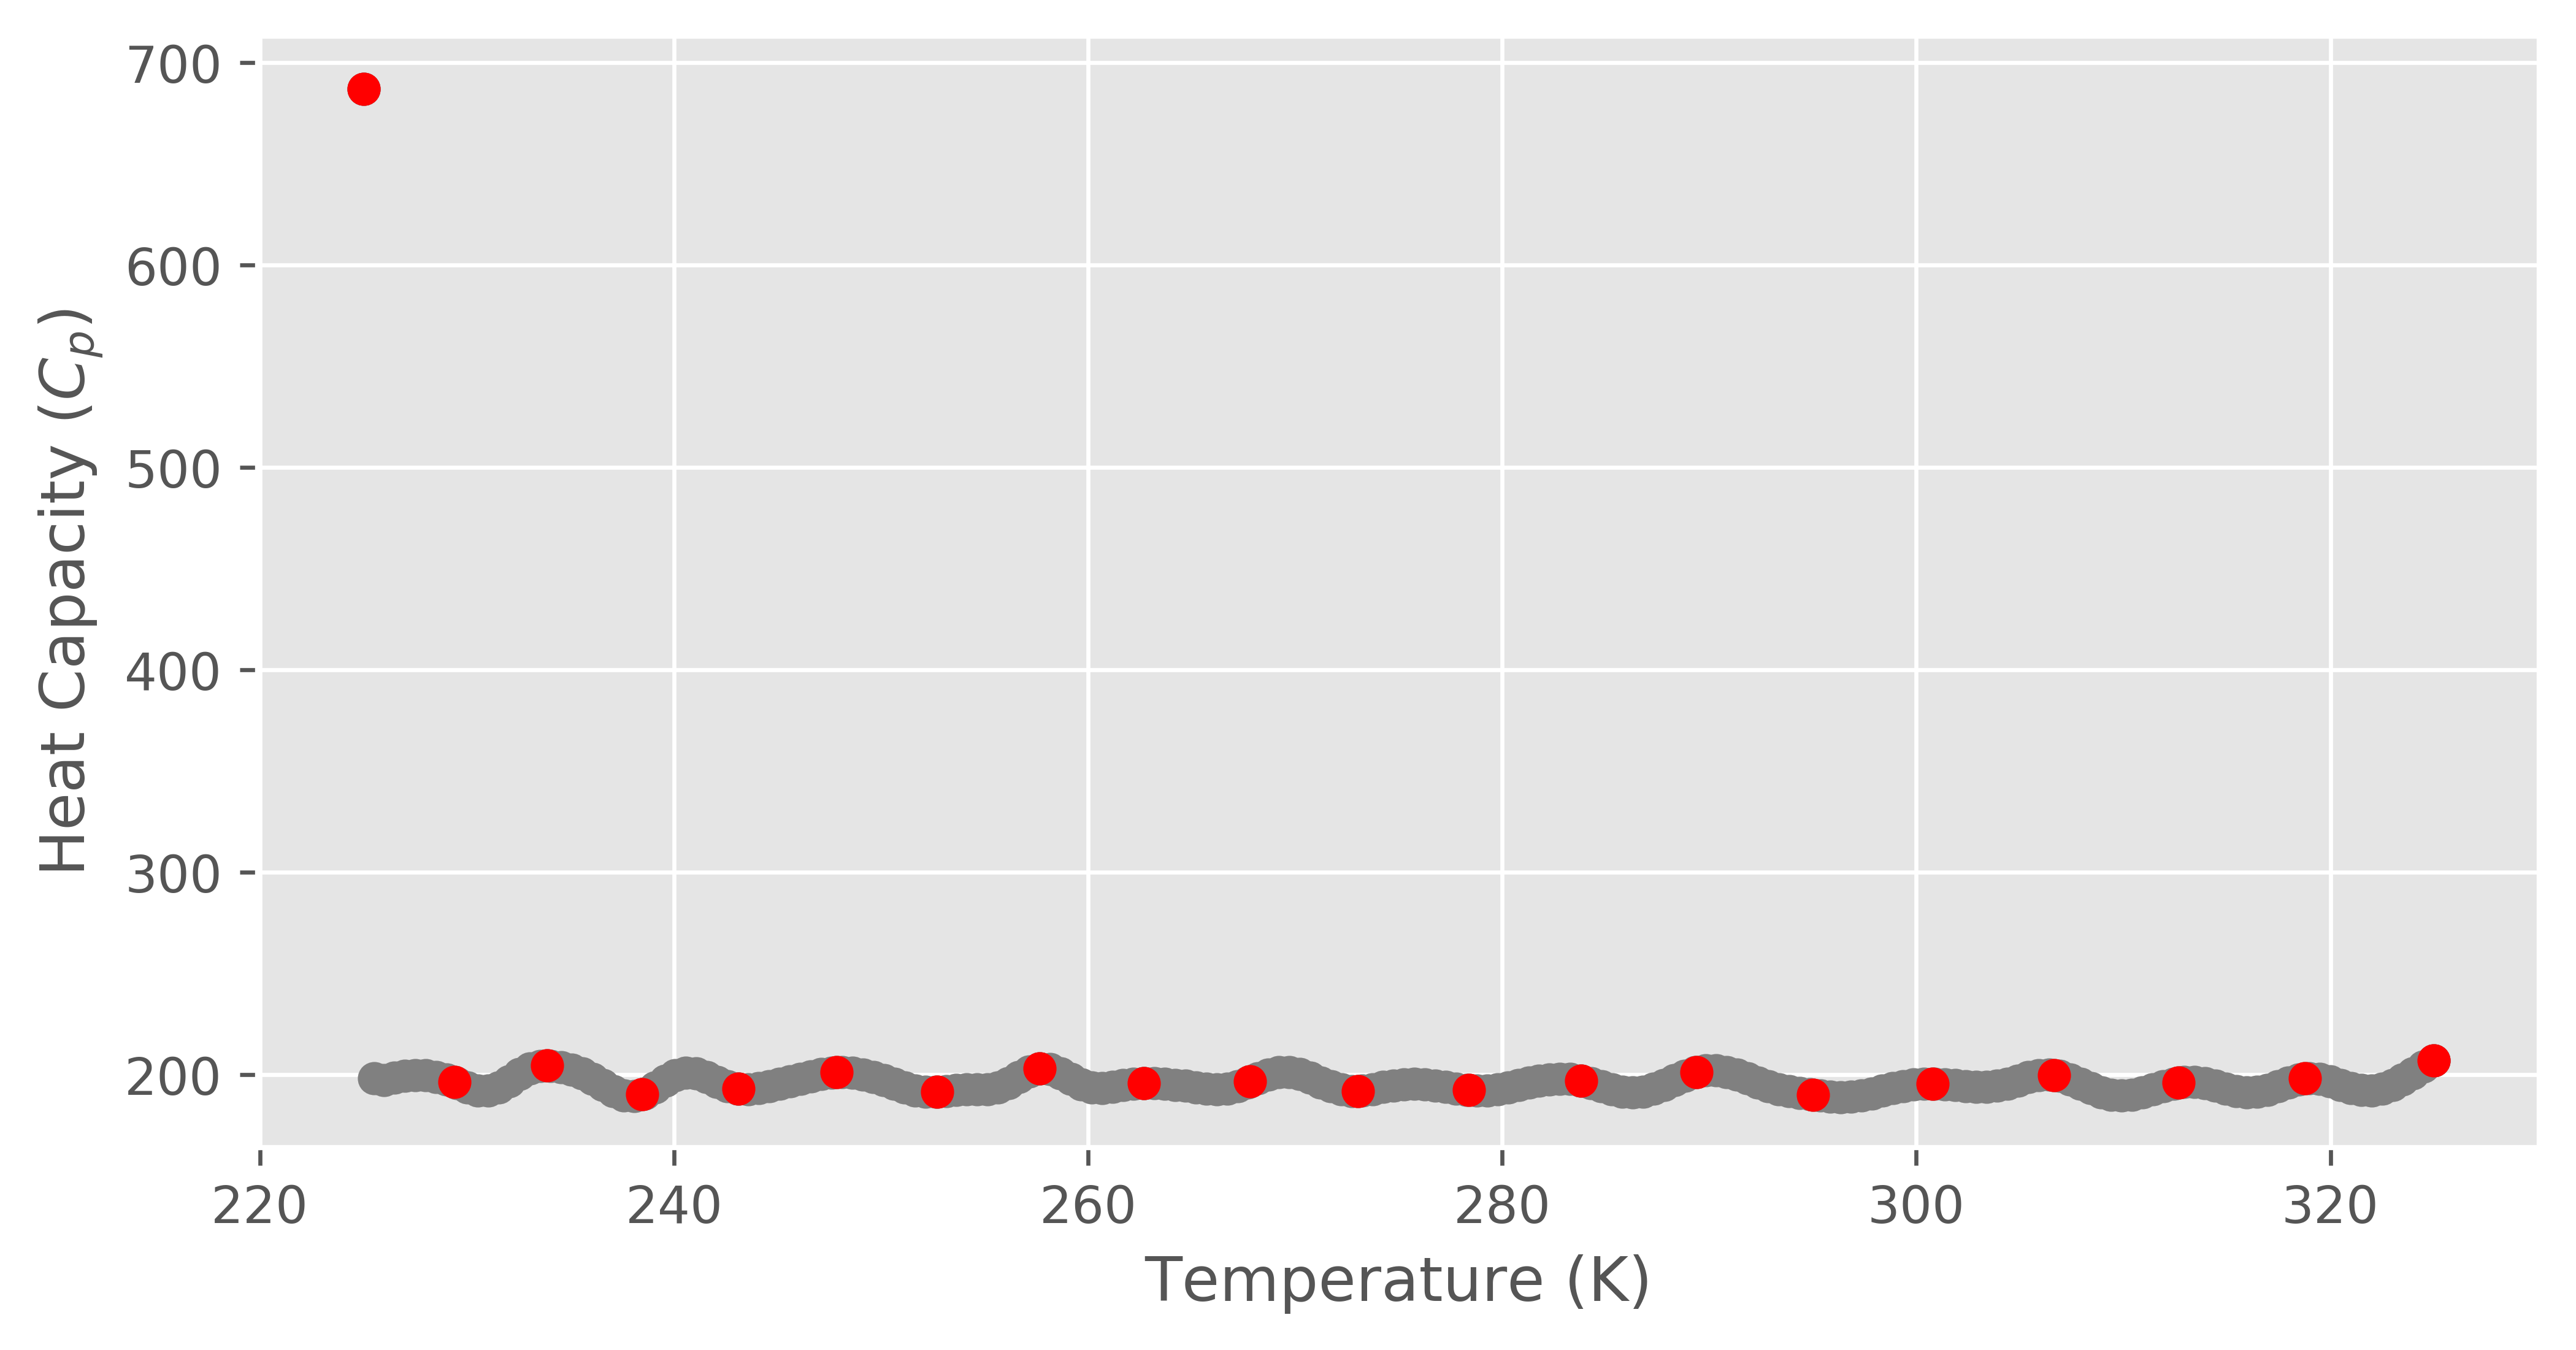

In [14]:
plt.figure(figsize=[8,4], dpi=600)
plt.scatter(t_list, Cp_expect, color = "gray")
plt.scatter(t_list[:20], Cp_expect[:20], color = "red")
plt.ylabel("Heat Capacity ($C_p$)")
plt.xlabel("Temperature (K)")

## Bootstrapping Cp Results

We can use bootstrapping to generate uncertainties in our data set.

In [15]:
# Attempted to multiprocess the MBAR Bootstrapping
# But it appears that the optimizations in pymbar parallelize to use all processors
# Or the single process of mbar is extremely memory intensive

def cp_bootstrap(j):
    print("Working on bootstrap", j,"...")
    t1 = time.time()
    energies_boot = []
    for i in range(len(energies)):
        energies_boot.append(np.random.choice(energies[i], size=len(energies[i])))
    # Solve MBAR equations
    u_kln_boot, n_samples_boot, t_list_boot, betas_boot = analysis_library.construct_u_kln_matrix(temps, energies_boot, add_temps = np.linspace(230, 325, 200))
    mbar_boot = pymbar.MBAR(u_kln_boot, n_samples_boot, verbose = False, relative_tolerance = 1e-10, initial_f_k= None, maximum_iterations=1000)
    # Compute expectations and variance of relevant terms
    E_kln_boot = u_kln_boot
    for k in range(u_kln_boot.shape[1]):
        E_kln_boot[:,k,:] *= betas_boot[k]**(-1)
    results = mbar_boot.computeExpectations(E_kln_boot, state_dependent=True, return_dict=True)
    E_expected = results['mu']
    results = mbar_boot.computeExpectations(E_kln_boot**2, state_dependent=True, return_dict=True)
    E2_expected = results['mu']
    # compute boot strap cp
    t2 = time.time()
    print("bootstraj", j, "took", t2-t1, "seconds")
    return((E2_expected - (E_expected*E_expected)) / (kb * t_list**2))
    

In [16]:
from multiprocessing import Pool
import time

N_boots = 100
pool = Pool(2)

cp_boot = pool.map(cp_bootstrap, range(N_boots))

Working on bootstrap 0 ...
Working on bootstrap 13 ...
bootstraj 0 took 9.84119987487793 seconds
Working on bootstrap 1 ...
bootstraj 13 took 10.3998703956604 seconds
Working on bootstrap 14 ...
bootstraj 1 took 9.335704803466797 seconds
Working on bootstrap 2 ...
bootstraj 14 took 9.08895468711853 seconds
Working on bootstrap 15 ...
bootstraj 2 took 9.002455711364746 seconds
Working on bootstrap 3 ...
bootstraj 15 took 9.527250528335571 seconds
Working on bootstrap 16 ...
bootstraj 3 took 9.068532466888428 seconds
Working on bootstrap 4 ...
bootstraj 16 took 8.991464853286743 seconds
Working on bootstrap 17 ...
bootstraj 4 took 9.17445993423462 seconds
Working on bootstrap 5 ...
bootstraj 17 took 9.050023555755615 seconds
Working on bootstrap 18 ...
bootstraj 5 took 9.122183799743652 seconds
Working on bootstrap 6 ...
bootstraj 18 took 9.384934425354004 seconds
Working on bootstrap 19 ...
bootstraj 6 took 9.621180295944214 seconds
Working on bootstrap 7 ...
bootstraj 19 took 9.8030052

bootstraj 21 took 9.102193355560303 seconds
Working on bootstrap 22 ...
bootstraj 9 took 9.036751508712769 seconds
Working on bootstrap 10 ...
bootstraj 22 took 8.845476627349854 seconds
Working on bootstrap 23 ...
bootstraj 10 took 8.969523191452026 seconds
Working on bootstrap 11 ...
bootstraj 23 took 9.204948425292969 seconds
Working on bootstrap 24 ...
bootstraj 11 took 9.325047969818115 seconds
Working on bootstrap 12 ...
bootstraj 24 took 9.085825681686401 seconds
Working on bootstrap 25 ...
bootstraj 12 took 9.005388021469116 seconds
Working on bootstrap 26 ...
bootstraj 25 took 9.1037118434906 seconds
Working on bootstrap 39 ...
bootstraj 26 took 9.097214698791504 seconds
Working on bootstrap 27 ...
bootstraj 39 took 8.835391521453857 seconds
Working on bootstrap 40 ...
bootstraj 27 took 9.143733263015747 seconds
Working on bootstrap 28 ...
bootstraj 40 took 9.192223072052002 seconds
Working on bootstrap 41 ...
bootstraj 28 took 8.873161554336548 seconds
Working on bootstrap 29

Working on bootstrap 31 ...
bootstraj 43 took 9.13132119178772 seconds
Working on bootstrap 44 ...
bootstraj 31 took 9.234212636947632 seconds
Working on bootstrap 32 ...
bootstraj 44 took 9.561362981796265 seconds
Working on bootstrap 45 ...
bootstraj 32 took 9.087377309799194 seconds
Working on bootstrap 33 ...
bootstraj 45 took 8.945434331893921 seconds
Working on bootstrap 46 ...
bootstraj 33 took 8.810651302337646 seconds
Working on bootstrap 34 ...
bootstraj 46 took 9.211045980453491 seconds
Working on bootstrap 47 ...
bootstraj 34 took 8.908671140670776 seconds
Working on bootstrap 35 ...
bootstraj 47 took 8.498331546783447 seconds
Working on bootstrap 48 ...
bootstraj 35 took 9.200729608535767 seconds
Working on bootstrap 36 ...
bootstraj 48 took 8.825360774993896 seconds
Working on bootstrap 49 ...
bootstraj 36 took 8.97416353225708 seconds
Working on bootstrap 37 ...
bootstraj 49 took 9.17774486541748 seconds
Working on bootstrap 50 ...
bootstraj 37 took 9.205293893814087 sec

bootstraj 52 took 9.06483006477356 seconds
Working on bootstrap 53 ...
bootstraj 65 took 8.918555498123169 seconds
Working on bootstrap 66 ...
bootstraj 53 took 8.993472814559937 seconds
Working on bootstrap 54 ...
bootstraj 66 took 8.992770195007324 seconds
Working on bootstrap 67 ...
bootstraj 54 took 8.95837116241455 seconds
Working on bootstrap 55 ...
bootstraj 67 took 9.218462467193604 seconds
Working on bootstrap 68 ...
bootstraj 55 took 9.163005828857422 seconds
Working on bootstrap 56 ...
bootstraj 68 took 9.015933275222778 seconds
Working on bootstrap 69 ...
bootstraj 56 took 9.099989891052246 seconds
Working on bootstrap 57 ...
bootstraj 69 took 9.023554563522339 seconds
Working on bootstrap 70 ...
bootstraj 57 took 8.974406242370605 seconds
Working on bootstrap 58 ...
bootstraj 70 took 9.005205154418945 seconds
Working on bootstrap 71 ...
bootstraj 58 took 9.221239566802979 seconds
Working on bootstrap 59 ...
bootstraj 71 took 8.862838506698608 seconds
Working on bootstrap 7

bootstraj 74 took 9.195403099060059 seconds
Working on bootstrap 75 ...
bootstraj 61 took 8.905786275863647 seconds
Working on bootstrap 62 ...
bootstraj 75 took 9.240815162658691 seconds
Working on bootstrap 76 ...
bootstraj 62 took 9.411686420440674 seconds
Working on bootstrap 63 ...
bootstraj 76 took 9.492903232574463 seconds
Working on bootstrap 77 ...
bootstraj 63 took 9.554637670516968 seconds
Working on bootstrap 64 ...
bootstraj 77 took 9.164192199707031 seconds
Working on bootstrap 78 ...
bootstraj 64 took 9.033397197723389 seconds
Working on bootstrap 91 ...
bootstraj 78 took 9.582178354263306 seconds
Working on bootstrap 79 ...
bootstraj 91 took 9.453532457351685 seconds
Working on bootstrap 92 ...
bootstraj 79 took 9.484230041503906 seconds
bootstraj 92 took 9.279836416244507 seconds
Working on bootstrap 80 ...
Working on bootstrap 93 ...
bootstraj 80 took 9.280324459075928 seconds
Working on bootstrap 81 ...
bootstraj 93 took 9.48435091972351 seconds
Working on bootstrap 

bootstraj 83 took 9.210671186447144 seconds
Working on bootstrap 84 ...
bootstraj 96 took 9.255293846130371 seconds
Working on bootstrap 97 ...
bootstraj 97 took 9.148591756820679 seconds
Working on bootstrap 98 ...
bootstraj 84 took 9.63725733757019 seconds
Working on bootstrap 85 ...
bootstraj 98 took 9.314387321472168 seconds
Working on bootstrap 99 ...
bootstraj 85 took 9.373953342437744 seconds
Working on bootstrap 86 ...
bootstraj 99 took 8.945239543914795 seconds
bootstraj 86 took 9.149444103240967 seconds
Working on bootstrap 87 ...
bootstraj 87 took 7.323026180267334 seconds
Working on bootstrap 88 ...
bootstraj 88 took 7.208327770233154 seconds
Working on bootstrap 89 ...
bootstraj 89 took 7.1812214851379395 seconds
Working on bootstrap 90 ...
bootstraj 90 took 7.2552995681762695 seconds


Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/lenny/anaconda3/envs/terphenyl/lib/python3.8/multiprocessing

In [17]:
cp_boot = np.array(cp_boot)

In [18]:
mu_cp_boot = np.mean(cp_boot, axis = 0)
sigma_cp_boot = np.std(cp_boot, axis = 0)

In [19]:
cp_boot

array([[811.97151239, 197.84664034, 207.16104823, ..., 202.94186699,
        208.31472076, 213.85475168],
       [795.6612067 , 195.5255308 , 207.9386111 , ..., 197.47009219,
        202.54419943, 206.68443963],
       [598.73861913, 195.88346858, 203.57279262, ..., 205.77058201,
        207.00656429, 207.82271228],
       ...,
       [651.85721873, 196.89740751, 204.89026967, ..., 196.94126164,
        200.82002668, 205.69633393],
       [492.09630519, 199.66391901, 201.07881063, ..., 201.41890498,
        204.7538014 , 207.58667342],
       [695.04279485, 198.01782407, 208.0208443 , ..., 205.79374454,
        208.94516982, 210.95789077]])

Text(0.5, 0, 'Temperature (K)')

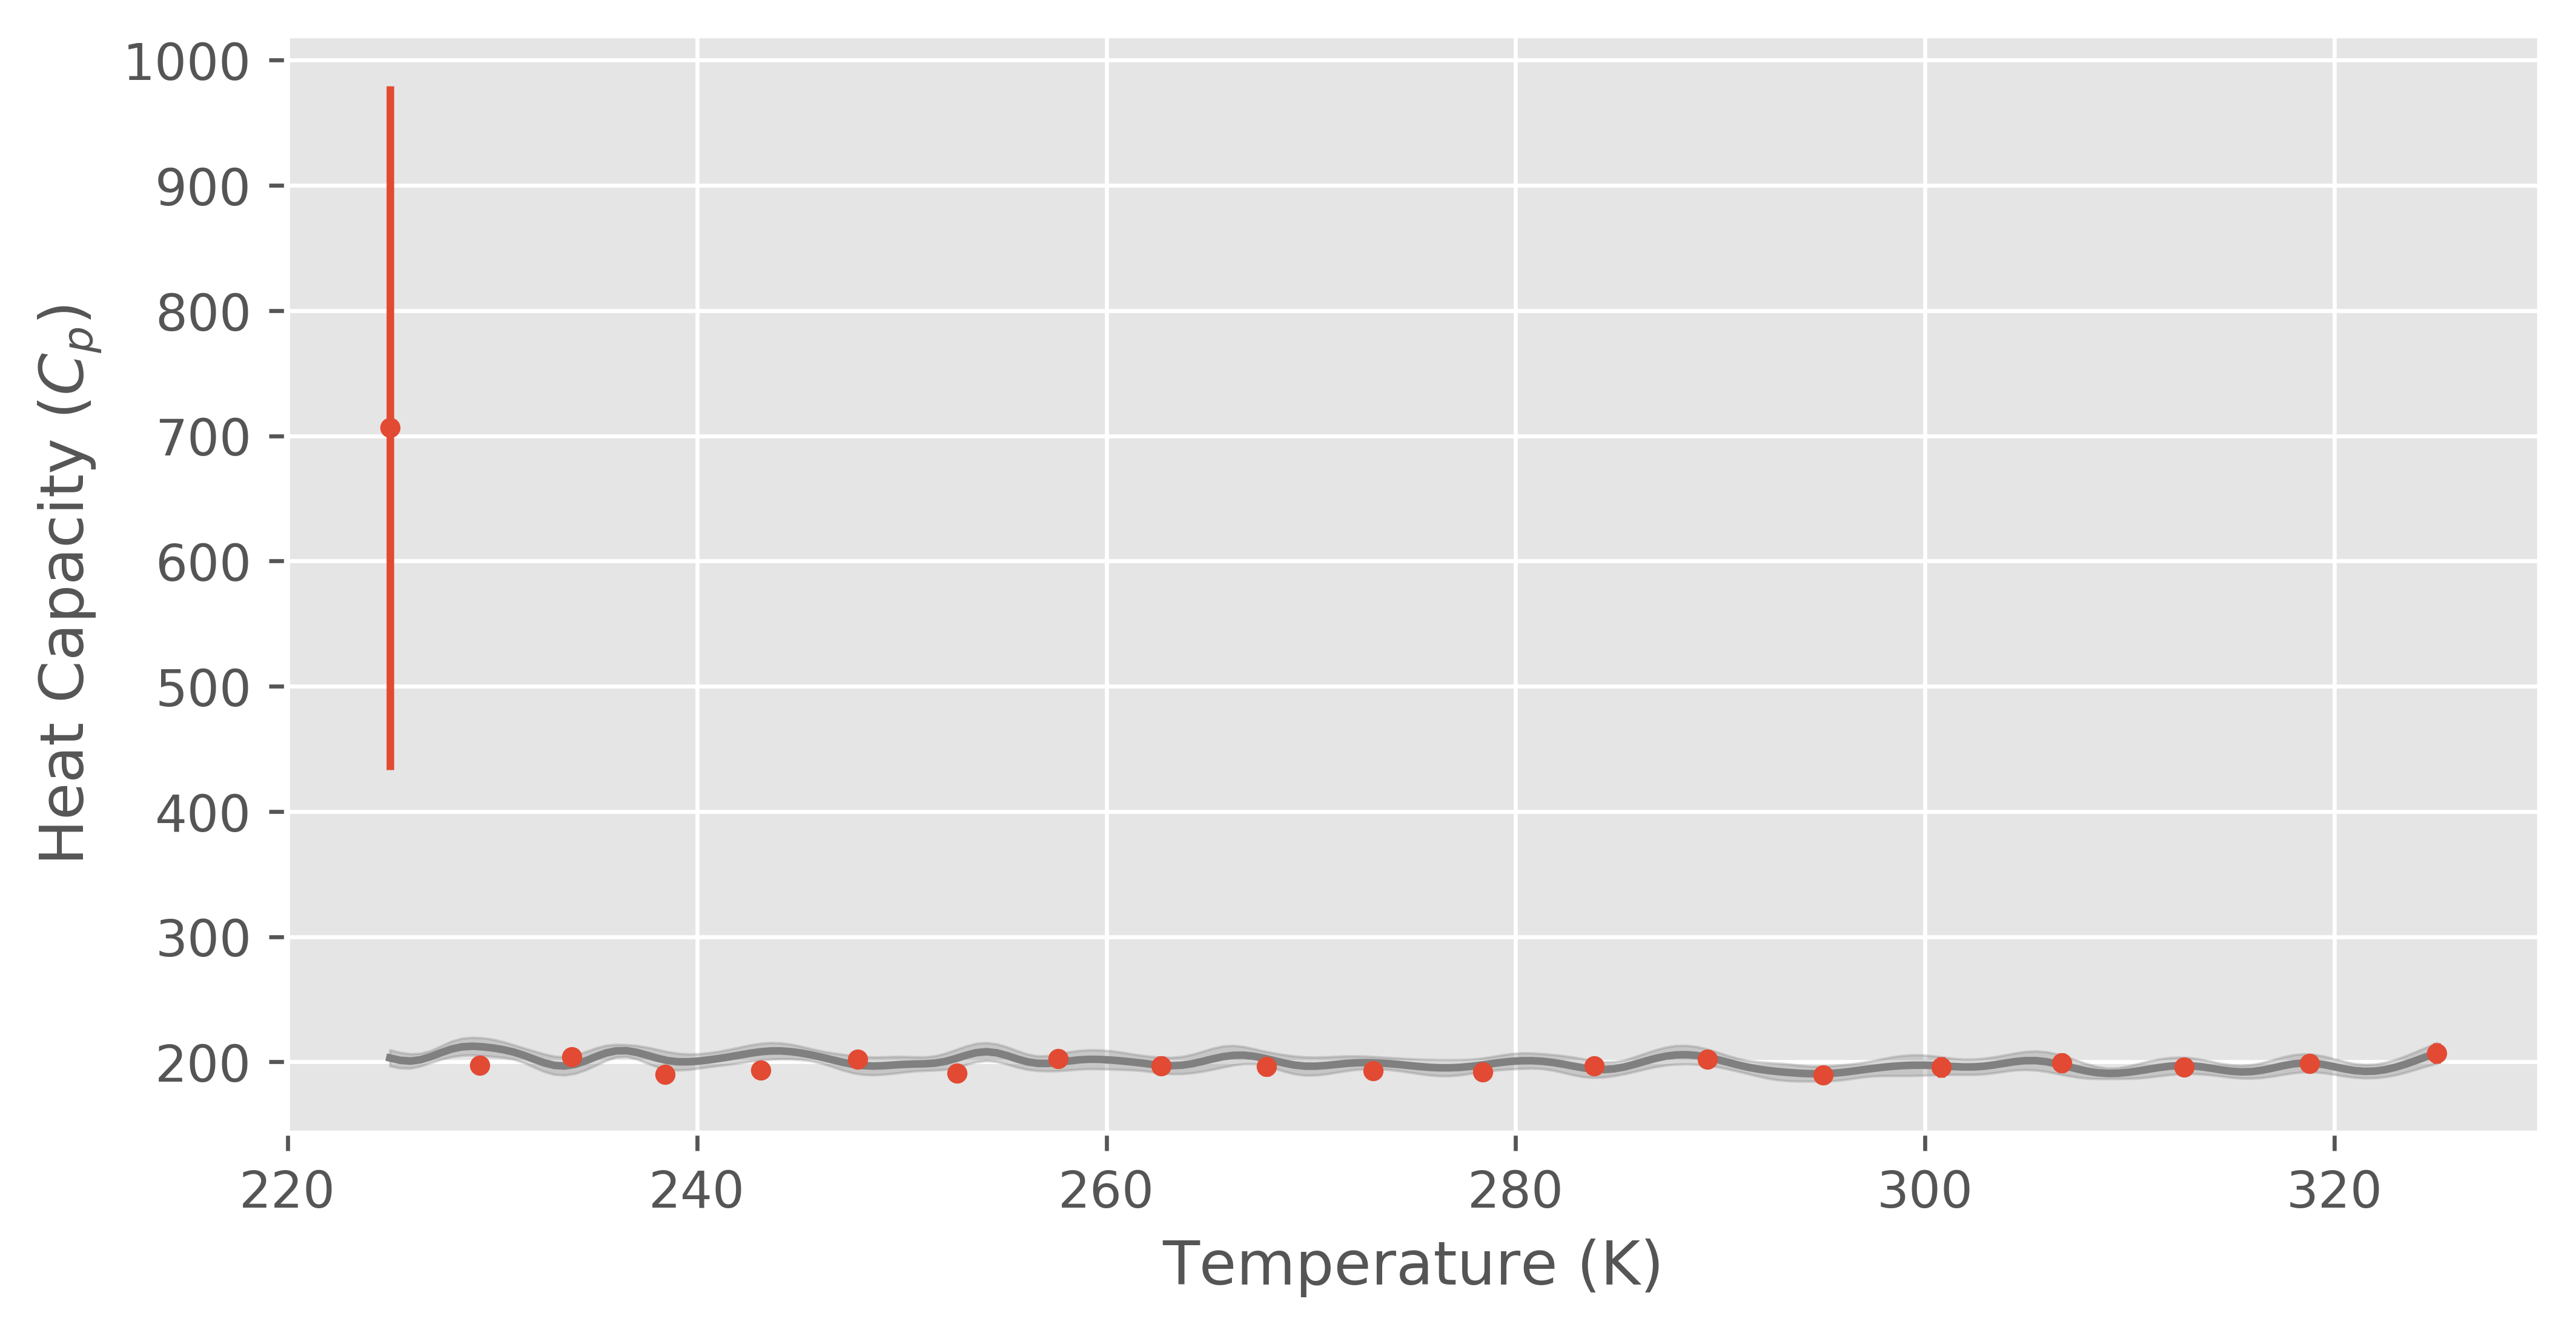

In [20]:
plt.figure(figsize=[8,4], dpi=600)
plt.plot(t_list[20:], mu_cp_boot[20:], color = "gray")
plt.fill_between(t_list[20:], mu_cp_boot[20:]-2*sigma_cp_boot[20:],  mu_cp_boot[20:]+2*sigma_cp_boot[20:], color="gray", alpha = 0.3)
plt.scatter(t_list[:20], mu_cp_boot[:20], color = "red", s = 5)
plt.errorbar(t_list[:20], mu_cp_boot[:20], yerr=2*sigma_cp_boot[:20], fmt=".")
plt.ylabel("Heat Capacity ($C_p$)")
plt.xlabel("Temperature (K)")



## H-Bonding with Temperature

Since we're unsure whether the Cp spike we're observing at 225 K is due to the solvent or the molecule, we need to investigate the average hydrogen bonds formed in each replica simulation. This will confirm if there is a significant change in the number of hydrogen bonds at low temperatures, indicating that the terphenyl molecule may be giving rise to the large heat capacity spike.

In [21]:
remd_trajs = analysis_library.REMD_trajectories("/mnt/summit/simulations/octamer_Rchiral/RHH/remd_sim/225K_to_325K", "npt", "whole.xtc","sim", "/mnt/summit/simulations/octamer_Rchiral/RHH/remd_sim/225K_to_325K/sim0/berendsen.gro", np = 10)

Replica 1
Replica 3
Replica 5
Replica 2
Replica 6
Replica 4
Replica 0
Replica 8
Replica 7
Replica 9
Replica 10
Replica 11
Replica 12
Replica 13
Replica 14
Replica 15
Replica 16
Replica 17
Replica 18
Replica 19


In [22]:
remd_trajs.trajs[0]

<mdtraj.Trajectory with 3784 frames, 6678 atoms, 1262 residues, and unitcells at 0x7fe0ec0f7f40>

In [23]:
remd_trajs.temps[0]

225.0

In [24]:
# H-bond finder class
# What are inputs?

# Selector builder?
h_acceptor_element = "O"
h_donor_elements = ["N", "H"]
residue_selector = "and resname OCT"

# H-bond finder
top = remd_trajs.trajs[0].topology
h_acceptors = top.select("element " + h_acceptor_element + " " + residue_selector)

nitrogens = top.select("element " + h_donor_elements[0] + " " + residue_selector)
hydrogens = top.select("element " + h_donor_elements[1] + " " + residue_selector)

In [25]:
nitrogens

array([ 35,  73, 127, 171, 215, 259, 303, 347])

In [26]:
h_acceptors

array([ 38,  41,  78,  79,  90, 112, 134, 156, 178, 200, 222, 244, 266,
       288, 310, 332, 352, 358, 359])

In [27]:
# get h_donors
h_donors = []
n_h_2 = 0.105 ** 2

for pair in itertools.product(nitrogens, hydrogens):
    r1 = remd_trajs.trajs[0].xyz[0, pair[0], :] - remd_trajs.trajs[0].xyz[0, pair[1], :]
    if np.dot(r1,r1) < n_h_2:
        h_donors.append(pair)

In [28]:
remd_trajs.trajs[0].xyz.shape

(3784, 6678, 3)

In [29]:
remd_trajs.trajs[0]

<mdtraj.Trajectory with 3784 frames, 6678 atoms, 1262 residues, and unitcells at 0x7fe0ec0f7f40>

In [59]:
o_h_2 = 0.3 ** 2
replica_h_bonds = []
replica_n_h_bonds = []
for replica in remd_trajs.trajs:
    h_bond = []
    n_h_bond = []
    for i in tqdm.tqdm(range(replica.xyz.shape[0])):
        frame_n_h_bond = 0
        frame_h_bond = []
        for pair in itertools.product(h_donors, h_acceptors):
            r2 = replica.xyz[i, pair[0][1],:] - replica.xyz[i, pair[1],:]
            d_sq = np.dot(r2,r2)
            if d_sq < o_h_2:
                r1 = replica.xyz[i, pair[0][0],:] - replica.xyz[i, pair[0][1],:]
                theta = np.arccos(np.dot(r1, r2) / np.sqrt(np.dot(r2,r2) * np.dot(r1,r1)))
                if np.abs(theta - np.pi) > (np.pi / 180 * 120):
                    frame_h_bond.append([pair[0], pair[1]])
                    frame_n_h_bond += 1
        h_bond.append(frame_h_bond)
        n_h_bond.append(frame_n_h_bond)
    replica_h_bonds.append(h_bond)
    replica_n_h_bonds.append(n_h_bond)
                    

100%|██████████| 3784/3784 [00:02<00:00, 1730.27it/s]


In [64]:
replica_n_h_bonds = np.array(replica_n_h_bonds)
replica_n_h_bonds.shape

(20, 3784)

In [44]:
temps = np.array(remd_trajs.temps)
replica_n_h_bonds = np.array([len(a)/remd_trajs.trajs[0].xyz.shape[0] for a in replica_h_bonds])

Text(0.5, 0, 'Replica Temperature')

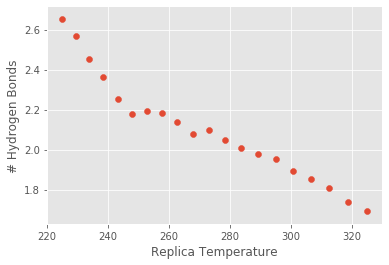

In [66]:
plt.scatter(temps, np.mean(replica_n_h_bonds, axis = 1))
plt.ylabel("# Hydrogen Bonds")
plt.xlabel("Replica Temperature")

In [73]:
replica_n_h_bonds.shape

(20, 3784)

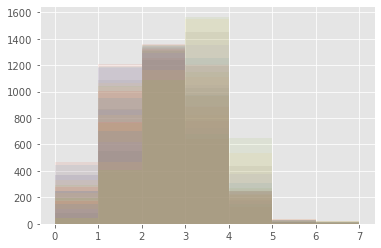

In [84]:
for i in reversed(range(replica_n_h_bonds.shape[0])):
    plt.hist(replica_n_h_bonds[i, :], bins = replica_n_h_bonds.max(), alpha = 0.1)


In [54]:
h_bond_kln = 

array([-5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
       -5589.04199219, -5589.04199219, -5589.04199219, -5589.04199219,
      